# Libraries.

In [ ]:
#Import Libraries for file manipulation.
import pandas as pd
import numpy as np

#Import libraries for Data visualization.
import seaborn as sns
from matplotlib import pyplot as plt

#Import libraries for model performance metrics.
from sklearn.metrics import classification_report, accuracy_score

#Import libraries for model training.
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

# Data Exploration
To build this dataset, we converted the pcap files collected for research project at USNW Sydney in 2018 listed below with NFStream, a network data analysis tool.

https://iotanalytics.unsw.edu.au/iottraces.html

Sivanathan, A., Habibi Gharakheili, H., Loi, F., Radford, A., Wijenayake, C., Vishwanath, A., and Sivaraman, V. , “ Classifying IoT Devices in Smart Environments Using Network Traffic Characteristics ” , IEEE Transactions on Mobile Computing (TMC), Aug, 2018. DOI: 10.1109/TMC.2018.2866249


In [ ]:
csv_files = ['16-10-01_with_device.csv','16-10-02_with_device.csv','16-10-03_with_device.csv','16-10-04_with_device.csv','16-10-05_with_device.csv','16-10-06_with_device.csv', '16-10-07_with_device.csv', '16-10-08_with_device.csv', '16-10-09_with_device.csv', '16-10-10_with_device.csv',
             '16-09-23_with_device.csv', '16-09-24_with_device.csv', '16-09-25_with_device.csv', '16-09-26_with_device.csv', '16-09-27_with_device.csv', '16-09-28_with_device.csv', '16-09-29_with_device.csv',
             '16-09-30_with_device.csv', '16-10-11_with_device.csv', '16-10-12_with_device.csv']

# List to hold DataFrames
dfs = []

# Loop through the list of CSV files and read each into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
iot_dataset = pd.concat(dfs, ignore_index=True)

In [ ]:
#Print the number of rows and features.
iot_dataset.shape

(919777, 25)

In [ ]:
#Print the first five records in the dataset.
iot_dataset.head()

,src_ip,src_mac,dst_ip,dst_mac,src_port,dst_port,bidirectional_bytes,src2dst_bytes,dst2src_bytes,bidirectional_min_ps,...,src2dst_max_ps,dst2src_min_ps,dst2src_mean_ps,dst2src_max_ps,bidirectional_packets,bidirectional_ack_packets,dst2src_rst_packets,application_name,application_category_name,device_name
0,192.168.1.249,00:16:6c:ab:6b:88,224.0.0.251,01:00:5e:00:00:fb,0,0,46,46,0,46,...,46,0,0.0,0,1,0,0,IGMP,Network,Samsung SmartCam
1,192.168.1.193,ec:1a:59:83:28:11,239.255.255.250,01:00:5e:7f:ff:fa,3080,1900,286,286,0,143,...,143,0,0.0,0,2,0,0,SSDP,System,Belkin wemo motion sensor
2,192.168.1.223,ec:1a:59:79:f4:89,192.168.1.193,ec:1a:59:83:28:11,4304,3080,1400,1400,0,350,...,350,0,0.0,0,4,0,0,SSDP,System,Belkin Wemo switch
3,192.168.1.241,70:ee:50:18:34:43,62.210.178.168,14:cc:20:51:33:ea,0,0,588,294,294,98,...,98,98,98.0,98,6,0,0,ICMP,Network,Netatmo Welcome
4,fe80::725a:fff:fee4:9bc0,70:5a:0f:e4:9b:c0,ff02::1:ffe4:9bc0,33:33:ff:e4:9b:c0,0,0,86,86,0,86,...,86,0,0.0,0,1,0,0,ICMPV6,Network,HP Printer


In [ ]:
#Print the unique device categories in the dataset.
iot_dataset["device_name"].unique()

array(['Samsung SmartCam', 'Belkin wemo motion sensor',
       'Belkin Wemo switch', 'Netatmo Welcome', 'HP Printer',
       'TP-Link Day Night Cloud camera', 'Insteon Camera',
       'TPLink Router Bridge LAN (Gateway)', 'TP-Link Smart plug',
       'Netatmo weather station', 'Amazon Echo', 'Triby Speaker',
       'PIX-STAR Photo-frame', 'Light Bulbs LiFX Smart Bulb',
       'Smart Things', 'Withings Smart Baby Monitor', 'iHome',
       'Withings Aura smart sleep sensor', 'Dropcam',
       'Withings Smart scale', 'Samsung Galaxy Tab',
       'NEST Protect smoke alarm', 'IPhone', 'MacBook', 'MacBook/Iphone',
       'Blipcare Blood Pressure meter', 'Android Phone', 'Laptop',
       'Android', 'Unknown Device', 'Nest Dropcam'], dtype=object)

In [ ]:
#Print count of records associated with each label in the dataset.
label_count = iot_dataset['device_name'].value_counts()
print(label_count)

device_name
Belkin wemo motion sensor             128017
TPLink Router Bridge LAN (Gateway)    107237
Samsung SmartCam                       85590
HP Printer                             83947
MacBook                                83367
Amazon Echo                            80517
Insteon Camera                         67868
Belkin Wemo switch                     59564
Netatmo Welcome                        45005
Laptop                                 40283
Samsung Galaxy Tab                     40238
TP-Link Day Night Cloud camera         15591
Light Bulbs LiFX Smart Bulb            15154
PIX-STAR Photo-frame                   12599
Withings Smart Baby Monitor            11051
Triby Speaker                           9301
Withings Aura smart sleep sensor        7598
Smart Things                            6875
Netatmo weather station                 6454
TP-Link Smart plug                      6396
Android Phone                           3764
iHome                                    74

In [ ]:
#Re-label non-IoT devices in the dataset.
iot_dataset.loc[(iot_dataset['device_name'] == 'Laptop'), 'device_name'] = 'Non IoT'
iot_dataset.loc[(iot_dataset['device_name'] == 'MacBook'), 'device_name'] = 'Non IoT'
iot_dataset.loc[(iot_dataset['device_name'] == 'Samsung Galaxy Tab'), 'device_name'] = 'Non IoT'
iot_dataset.loc[(iot_dataset['device_name'] == 'Android Phone'), 'device_name'] = 'Non IoT'
iot_dataset.loc[(iot_dataset['device_name'] == 'MacBook/Iphone'), 'device_name'] = 'Non IoT'
iot_dataset.loc[(iot_dataset['device_name'] == 'Unknown Device'), 'device_name'] = 'Non IoT'
iot_dataset.loc[(iot_dataset['device_name'] == 'Android'), 'device_name'] = 'Non IoT'
iot_dataset.loc[(iot_dataset['device_name'] == 'IPhone'), 'device_name'] = 'Non IoT'
iot_dataset.loc[(iot_dataset['device_name'] == 'Chromebook'), 'device_name'] = 'Non IoT'
iot_dataset.loc[(iot_dataset['device_name'] == 'TPLink Router Bridge LAN (Gateway)'), 'device_name'] = 'Non IoT'

In [ ]:
#Print count of records associated with each label in the dataset.
label_count = iot_dataset['device_name'].value_counts()
print(label_count)

device_name
Non IoT                               169281
Belkin wemo motion sensor             128017
TPLink Router Bridge LAN (Gateway)    107237
Samsung SmartCam                       85590
HP Printer                             83947
Amazon Echo                            80517
Insteon Camera                         67868
Belkin Wemo switch                     59564
Netatmo Welcome                        45005
TP-Link Day Night Cloud camera         15591
Light Bulbs LiFX Smart Bulb            15154
PIX-STAR Photo-frame                   12599
Withings Smart Baby Monitor            11051
Triby Speaker                           9301
Withings Aura smart sleep sensor        7598
Smart Things                            6875
Netatmo weather station                 6454
TP-Link Smart plug                      6396
iHome                                    749
Dropcam                                  607
NEST Protect smoke alarm                 176
Withings Smart scale                     11

In [ ]:
#Check for missing or null values.
iot_dataset.isna().sum().sum()

np.int64(0)

In [ ]:
#Check for duplicates.
iot_dataset.duplicated().any()

np.True_

In [ ]:
#Drop the duplicates in the dataset and print the number of rows and features.
iot_dataset.drop_duplicates(inplace=True)
iot_dataset.shape

(366715, 25)

In [ ]:
#Print the first five records in iot_dataset.
iot_dataset.head()

,src_ip,src_mac,dst_ip,dst_mac,src_port,dst_port,bidirectional_bytes,src2dst_bytes,dst2src_bytes,bidirectional_min_ps,...,src2dst_max_ps,dst2src_min_ps,dst2src_mean_ps,dst2src_max_ps,bidirectional_packets,bidirectional_ack_packets,dst2src_rst_packets,application_name,application_category_name,device_name
0,192.168.1.249,00:16:6c:ab:6b:88,224.0.0.251,01:00:5e:00:00:fb,0,0,46,46,0,46,...,46,0,0.0,0,1,0,0,IGMP,Network,Samsung SmartCam
1,192.168.1.193,ec:1a:59:83:28:11,239.255.255.250,01:00:5e:7f:ff:fa,3080,1900,286,286,0,143,...,143,0,0.0,0,2,0,0,SSDP,System,Belkin wemo motion sensor
2,192.168.1.223,ec:1a:59:79:f4:89,192.168.1.193,ec:1a:59:83:28:11,4304,3080,1400,1400,0,350,...,350,0,0.0,0,4,0,0,SSDP,System,Belkin Wemo switch
3,192.168.1.241,70:ee:50:18:34:43,62.210.178.168,14:cc:20:51:33:ea,0,0,588,294,294,98,...,98,98,98.0,98,6,0,0,ICMP,Network,Netatmo Welcome
4,fe80::725a:fff:fee4:9bc0,70:5a:0f:e4:9b:c0,ff02::1:ffe4:9bc0,33:33:ff:e4:9b:c0,0,0,86,86,0,86,...,86,0,0.0,0,1,0,0,ICMPV6,Network,HP Printer


# Balanced Dataset
In this section, we are determining if we are working with balanced or imbalanced dataset. From the graph below, we can conclude that the dataset is not balanced.

<ipython-input-49-5f0285abb5aa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=iot_dataset, x='device_name', palette='deep')


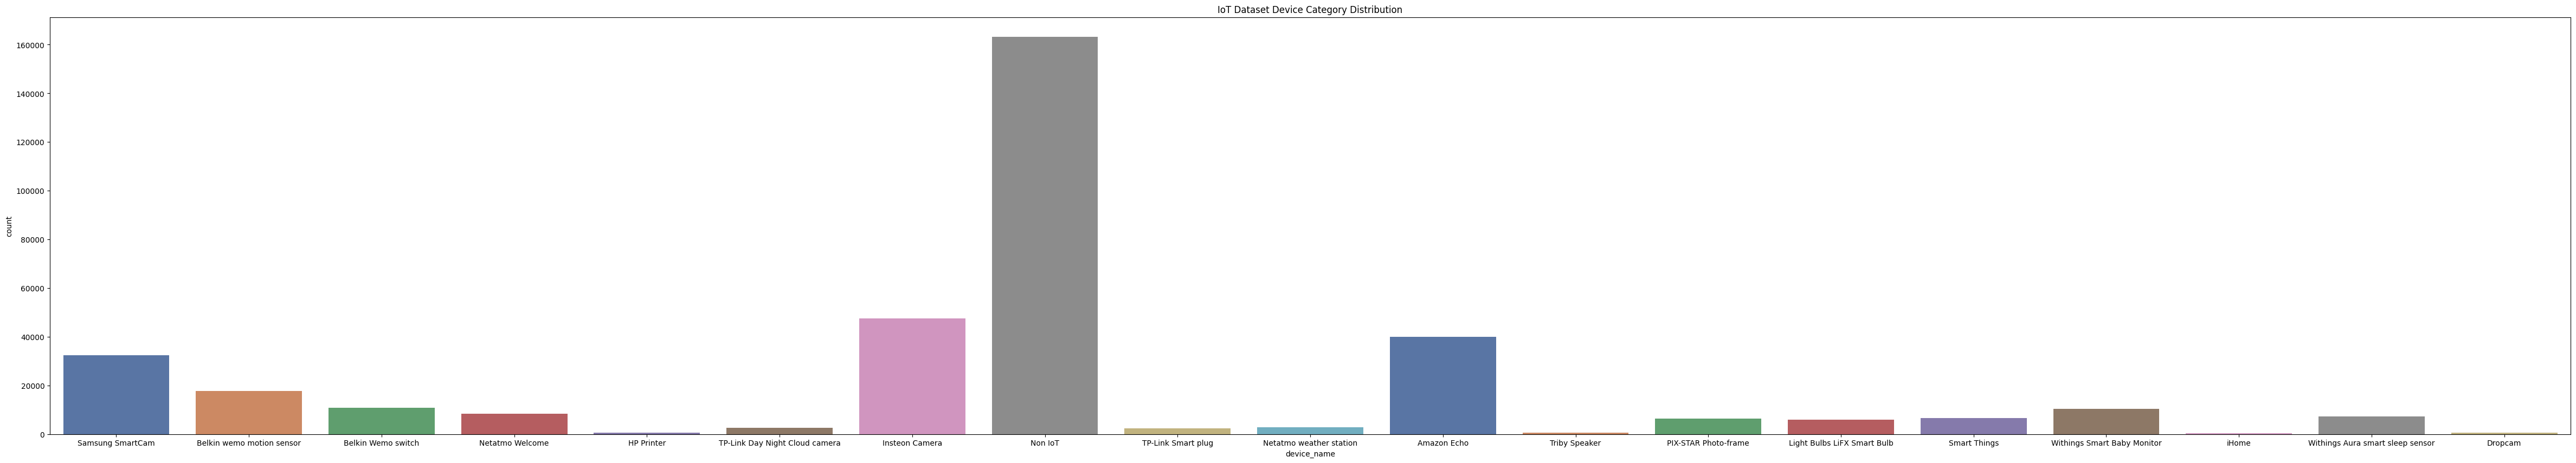

In [ ]:
#Create count plot to visualize the distribution of the 'device_category' column in the dataset.
plt.figure(figsize=(60,10))
plt.title("IoT Dataset Device Category Distribution")
sns.countplot(data=iot_dataset, x='device_name', palette='deep')
plt.show()

# Feature Engineering
In this section, we are removing any feature in the dataset that will not contribute to the performance of the model. Additionally, we display a correlation matrix for a subset of the features of the dataset (around 20 features) to see the relationship between the features.

In [ ]:
#Drop columns to avoid bias in model.
columns_to_drop = ['dst_ip', 'dst_mac', 'src_ip', 'src_mac']
iot_dataset.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Define the list of device names to drop since they are the least represented in the dataset.
devices_to_remove = ['NEST Protect smoke alarm', 'Withings Smart scale', 'Nest Dropcam', 'Blipcare Blood Pressure meter']

# Filter rows based on the 'device_name' column and get the indexes
row_indexes = iot_dataset[iot_dataset['device_name'].isin(devices_to_remove)].index

# Print the number of rows to be dropped
print(len(row_indexes))

# Drop the rows from the dataset
iot_dataset.drop(row_indexes, inplace=True)

229


In [ ]:
#Print the number of columns in the dataset.
len(iot_dataset.columns)

21

In [ ]:
#Get the columns in dataset of type float or int.
numerical_cols = iot_dataset.select_dtypes(include=['float64', 'int64']).columns

# Create the scaler
scaler = StandardScaler()

# Apply the scaler to the numerical columns
iot_dataset[numerical_cols] = scaler.fit_transform(iot_dataset[numerical_cols])

In [ ]:
#Create an instance label_encoder to transform string or object data into numeric data.
label_encoder = LabelEncoder()
iot_dataset['application_name'] = label_encoder.fit_transform(iot_dataset['application_name'])
iot_dataset['application_category_name'] = label_encoder.fit_transform(iot_dataset['application_category_name'])

In [ ]:
print(iot_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 366486 entries, 0 to 919776
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   src_port                   366486 non-null  float64
 1   dst_port                   366486 non-null  float64
 2   bidirectional_bytes        366486 non-null  float64
 3   src2dst_bytes              366486 non-null  float64
 4   dst2src_bytes              366486 non-null  float64
 5   bidirectional_min_ps       366486 non-null  float64
 6   bidirectional_mean_ps      366486 non-null  float64
 7   bidirectional_stddev_ps    366486 non-null  float64
 8   bidirectional_max_ps       366486 non-null  float64
 9   src2dst_min_ps             366486 non-null  float64
 10  src2dst_mean_ps            366486 non-null  float64
 11  src2dst_max_ps             366486 non-null  float64
 12  dst2src_min_ps             366486 non-null  float64
 13  dst2src_mean_ps            366486 

# Model Training
In this section, we are training a Random Forest model able to identify different types of IoT devices based on the 'iot_dataset'.

In [ ]:
# Separate the dataset into features (X) and target variable (Y)
# X_data contains all features except 'device_name'
# Y_data contains the target column 'device_name'
X_data = iot_dataset.drop(["device_name"], axis=1)
X_data.head()

,src_port,dst_port,bidirectional_bytes,src2dst_bytes,dst2src_bytes,bidirectional_min_ps,bidirectional_mean_ps,bidirectional_stddev_ps,bidirectional_max_ps,src2dst_min_ps,src2dst_mean_ps,src2dst_max_ps,dst2src_min_ps,dst2src_mean_ps,dst2src_max_ps,bidirectional_packets,bidirectional_ack_packets,dst2src_rst_packets,application_name,application_category_name
0,-2.274167,-0.613540,-0.005605,-0.002891,-0.004927,-0.320641,-0.657407,-0.687195,-0.708506,-0.347343,-0.454889,-0.547959,-0.923814,-0.891116,-0.707897,-0.009157,-0.008438,-0.492001,109,15
1,-2.109949,-0.517980,-0.005559,-0.002804,-0.004927,0.308565,-0.139283,-0.687195,-0.500145,0.281924,0.081184,-0.243003,-0.923814,-0.891116,-0.707897,-0.008963,-0.008438,-0.492001,168,22
2,-2.044688,-0.458632,-0.005342,-0.002400,-0.004927,1.651305,0.966403,-0.687195,-0.055498,1.624793,1.225173,0.407780,-0.923814,-0.891116,-0.707897,-0.008576,-0.008438,-0.492001,168,22
3,-2.274167,-0.613540,-0.005500,-0.002801,-0.004857,0.016665,-0.379650,-0.687195,-0.596807,-0.010004,-0.167510,-0.384477,-0.097573,-0.392701,-0.489628,-0.008189,-0.008438,-0.492001,106,15
4,-2.274167,-0.613540,-0.005598,-0.002877,-0.004927,-0.061175,-0.443748,-0.687195,-0.622584,-0.087851,-0.233828,-0.422203,-0.923814,-0.891116,-0.707897,-0.009157,-0.008438,-0.492001,107,15


In [ ]:
# Y_data contains the target column 'device_name'
Y_data = iot_dataset["device_name"]

In [ ]:
#Split the dataset into train values and test values.
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)

(274864, 20)
(91622, 20)


In [ ]:
#Initiate an instance of Random Forest Classifier, forest_classifier.
forest_classifier = RandomForestClassifier(n_estimators=50, random_state=np.random.randint(100))

#Train the model on training set and evaluate on testing set.
forest_classifier.fit(X_train, y_train)
y_pred = forest_classifier.predict(X_test)

#Compute and print performance metrics.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred, digits=4))

Accuracy: 0.9832791251009583
                                  precision    recall  f1-score   support

                     Amazon Echo     0.9686    0.9627    0.9656      9953
              Belkin Wemo switch     0.9842    0.9793    0.9818      2610
       Belkin wemo motion sensor     0.9890    0.9899    0.9895      4373
                         Dropcam     0.8786    0.9111    0.8945       135
                      HP Printer     0.9313    0.8142    0.8688       183
                  Insteon Camera     0.9879    0.9901    0.9890     11928
     Light Bulbs LiFX Smart Bulb     0.9987    0.9987    0.9987      1492
                 Netatmo Welcome     0.8710    0.8690    0.8700      2160
         Netatmo weather station     0.9615    0.9825    0.9719       687
                         Non IoT     0.9909    0.9935    0.9922     40812
            PIX-STAR Photo-frame     0.9839    0.9708    0.9773      1576
                Samsung SmartCam     0.9924    0.9877    0.9901      8114
        

In [ ]:
# Save the trained Random Forest model
joblib.dump(forest_classifier, 'iot_device_identification_model.pkl')
print("Model saved successfully!")

Model saved successfully!
